# Capstone Project Data Science IBM Course

## Analysis of the Data

In [2]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### read data into panda dataframe

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_765bfa1f84ec4a468f0189381a0be3ca = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MN3tG1TXkmujVbenjuMLc3FTAYU5iomzlYA1QzSJXsaP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_765bfa1f84ec4a468f0189381a0be3ca.get_object(Bucket='default-donotdelete-pr-cbhkwntjbzc35y',Key='col_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_col = pd.read_csv(body)
df_col.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
# already downloaded from internet manually
#df_col = pd.read_csv('col_data.csv')
#df_col.head()

In [5]:
df_col.shape

(194673, 38)

In [6]:
df_col.nunique()

SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE         10
PERSONCOUNT           47
PEDCOUNT               7
PEDCYLCOUNT            3
VEHCOUNT              13
INCDATE             5985
INCDTTM           162058
JUNCTIONTYPE           7
SDOT_COLCODE          39
SDOT_COLDESC          39
INATTENTIONIND         1
UNDERINFL              4
WEATHER               11
ROADCOND               9
LIGHTCOND              9
PEDROWNOTGRNT          1
SDOTCOLNUM        114932
SPEEDING               1
ST_COLCODE           115
ST_COLDESC            62
SEGLANEKEY          1955
CROSSWALKKEY        2198
HITPARKEDCAR           2
dtype: int64

In [9]:
df_col.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [10]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [12]:
df_col.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


### Data Wrangling and Analysis

In [9]:
#get rid of all uneccesary columns
used_columns = ['SEVERITYCODE','X','Y','ADDRTYPE','INCDTTM','WEATHER','ROADCOND','LIGHTCOND']
df_col = df_col[used_columns]
df_col.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,Intersection,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,1,-122.347294,47.647172,Block,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,Block,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,1,-122.334803,47.604803,Block,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,2,-122.306426,47.545739,Intersection,1/28/2004 8:04:00 AM,Raining,Wet,Daylight


In [10]:
df_col.count()

SEVERITYCODE    194673
X               189339
Y               189339
ADDRTYPE        192747
INCDTTM         194673
WEATHER         189592
ROADCOND        189661
LIGHTCOND       189503
dtype: int64

In [11]:
# drop all lines where there is a NaN value
df_col = df_col.dropna()
df_col.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,Intersection,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,1,-122.347294,47.647172,Block,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,Block,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,1,-122.334803,47.604803,Block,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,2,-122.306426,47.545739,Intersection,1/28/2004 8:04:00 AM,Raining,Wet,Daylight


In [12]:
df_col.dtypes

SEVERITYCODE      int64
X               float64
Y               float64
ADDRTYPE         object
INCDTTM          object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

In [13]:
#check for unique values in Dataset
df_col.nunique()

SEVERITYCODE         2
X                23398
Y                23671
ADDRTYPE             2
INCDTTM         155840
WEATHER             11
ROADCOND             9
LIGHTCOND            9
dtype: int64

Note, that the severity code only has two unique values, 1 = propery damage and 2=injuries

In [14]:
df_col.shape

(184167, 8)

In [15]:
#strip all trailing white spaces from column names
df_col.columns = df_col.columns.str.strip()

In [16]:
#get_dummies for all object type values except DATETIME column
cols_for_dummies = ['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
df_col_dum = pd.get_dummies(df_col[cols_for_dummies])
df_col_dum.head()

,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [17]:
df_col_dum.columns

Index(['ADDRTYPE_Block', 'ADDRTYPE_Intersection', 'WEATHER_Blowing Sand/Dirt',
       'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other',
       'WEATHER_Overcast', 'WEATHER_Partly Cloudy', 'WEATHER_Raining',
       'WEATHER_Severe Crosswind', 'WEATHER_Sleet/Hail/Freezing Rain',
       'WEATHER_Snowing', 'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice',
       'ROADCOND_Oil', 'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt',
       'ROADCOND_Snow/Slush', 'ROADCOND_Standing Water', 'ROADCOND_Unknown',
       'ROADCOND_Wet', 'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other',
       'LIGHTCOND_Unknown'],
      dtype='object')

In [18]:
#concatenate dummies data frame with original dataframe
df_col = pd.concat([df_col,df_col_dum], axis = 1)

In [19]:
df_col.head(5)

,SEVERITYCODE,X,Y,ADDRTYPE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE_Block,ADDRTYPE_Intersection,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,-122.323148,47.703140,Intersection,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,0,1,...,1,0,0,0,0,0,1,0,0,0
1,1,-122.347294,47.647172,Block,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,-122.334540,47.607871,Block,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,-122.334803,47.604803,Block,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2,-122.306426,47.545739,Intersection,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,0,1,...,1,0,0,0,0,0,1,0,0,0


In [20]:
df_col.dtypes

SEVERITYCODE                            int64
X                                     float64
Y                                     float64
ADDRTYPE                               object
INCDTTM                                object
WEATHER                                object
ROADCOND                               object
LIGHTCOND                              object
ADDRTYPE_Block                          uint8
ADDRTYPE_Intersection                   uint8
WEATHER_Blowing Sand/Dirt               uint8
WEATHER_Clear                           uint8
WEATHER_Fog/Smog/Smoke                  uint8
WEATHER_Other                           uint8
WEATHER_Overcast                        uint8
WEATHER_Partly Cloudy                   uint8
WEATHER_Raining                         uint8
WEATHER_Severe Crosswind                uint8
WEATHER_Sleet/Hail/Freezing Rain        uint8
WEATHER_Snowing                         uint8
WEATHER_Unknown                         uint8
ROADCOND_Dry                      

In [21]:
# drop columns 

df_col = df_col.drop(columns=cols_for_dummies, axis = 1)
df_col.dtypes


SEVERITYCODE                            int64
X                                     float64
Y                                     float64
INCDTTM                                object
ADDRTYPE_Block                          uint8
ADDRTYPE_Intersection                   uint8
WEATHER_Blowing Sand/Dirt               uint8
WEATHER_Clear                           uint8
WEATHER_Fog/Smog/Smoke                  uint8
WEATHER_Other                           uint8
WEATHER_Overcast                        uint8
WEATHER_Partly Cloudy                   uint8
WEATHER_Raining                         uint8
WEATHER_Severe Crosswind                uint8
WEATHER_Sleet/Hail/Freezing Rain        uint8
WEATHER_Snowing                         uint8
WEATHER_Unknown                         uint8
ROADCOND_Dry                            uint8
ROADCOND_Ice                            uint8
ROADCOND_Oil                            uint8
ROADCOND_Other                          uint8
ROADCOND_Sand/Mud/Dirt            

In [22]:
#drop datetime and location, see report for explanation
df_col = df_col.drop(columns = ['INCDTTM'], axis=1)
df_col.head()


,SEVERITYCODE,X,Y,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,-122.323148,47.703140,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,1,-122.347294,47.647172,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,-122.334540,47.607871,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,-122.334803,47.604803,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,-122.306426,47.545739,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [23]:
df_col = df_col.drop(columns = ['X','Y'], axis=1)
df_col.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [24]:
df_col.shape

(184167, 32)

**delete rows where WEATHER_Other == 1, WEATHER_Unknown == 1, ROADCOND_Other==1, ROADCOND_Unknown==1, LIGHTCOND_Other==1, LIGHTCOND_Unknown==1**


In [25]:
df_col1 = df_col.drop(df_col[(df_col.WEATHER_Unknown == 1) | (df_col.WEATHER_Other == 1) | 
                            (df_col.ROADCOND_Other == 1) | (df_col.ROADCOND_Unknown == 1) |
                            (df_col.LIGHTCOND_Unknown == 1) | (df_col.LIGHTCOND_Other == 1)].index)


df_col1.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [26]:
df_col1.shape

(166217, 32)

In [27]:
df_col1.nunique()

SEVERITYCODE                          2
ADDRTYPE_Block                        2
ADDRTYPE_Intersection                 2
WEATHER_Blowing Sand/Dirt             2
WEATHER_Clear                         2
WEATHER_Fog/Smog/Smoke                2
WEATHER_Other                         1
WEATHER_Overcast                      2
WEATHER_Partly Cloudy                 2
WEATHER_Raining                       2
WEATHER_Severe Crosswind              2
WEATHER_Sleet/Hail/Freezing Rain      2
WEATHER_Snowing                       2
WEATHER_Unknown                       1
ROADCOND_Dry                          2
ROADCOND_Ice                          2
ROADCOND_Oil                          2
ROADCOND_Other                        1
ROADCOND_Sand/Mud/Dirt                2
ROADCOND_Snow/Slush                   2
ROADCOND_Standing Water               2
ROADCOND_Unknown                      1
ROADCOND_Wet                          2
LIGHTCOND_Dark - No Street Lights     2
LIGHTCOND_Dark - Street Lights Off    2


In [28]:
df_col=df_col1

In [29]:
#drop unknown/other columns
unknown_other_columns = ['WEATHER_Unknown', 'WEATHER_Other', 'ROADCOND_Other', 'ROADCOND_Unknown', 'LIGHTCOND_Unknown', 'LIGHTCOND_Other']
df_col = df_col.drop(columns=unknown_other_columns, axis=1)

In [30]:
df_col.nunique()

SEVERITYCODE                          2
ADDRTYPE_Block                        2
ADDRTYPE_Intersection                 2
WEATHER_Blowing Sand/Dirt             2
WEATHER_Clear                         2
WEATHER_Fog/Smog/Smoke                2
WEATHER_Overcast                      2
WEATHER_Partly Cloudy                 2
WEATHER_Raining                       2
WEATHER_Severe Crosswind              2
WEATHER_Sleet/Hail/Freezing Rain      2
WEATHER_Snowing                       2
ROADCOND_Dry                          2
ROADCOND_Ice                          2
ROADCOND_Oil                          2
ROADCOND_Sand/Mud/Dirt                2
ROADCOND_Snow/Slush                   2
ROADCOND_Standing Water               2
ROADCOND_Wet                          2
LIGHTCOND_Dark - No Street Lights     2
LIGHTCOND_Dark - Street Lights Off    2
LIGHTCOND_Dark - Street Lights On     2
LIGHTCOND_Dark - Unknown Lighting     2
LIGHTCOND_Dawn                        2
LIGHTCOND_Daylight                    2


In [31]:
df_col.reset_index()
df_col.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,...,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
0,2,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [32]:
df_col.shape

(166217, 26)

### Visualize data

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt

**Complete Data Set**

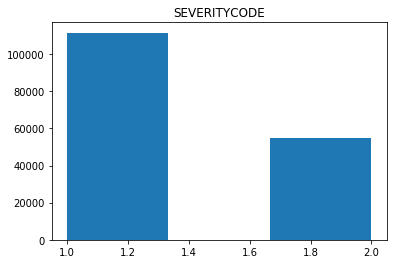

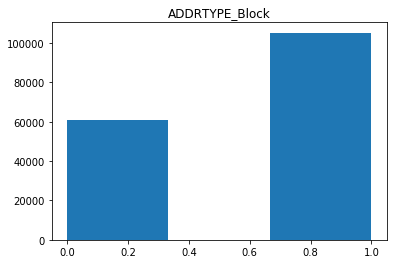

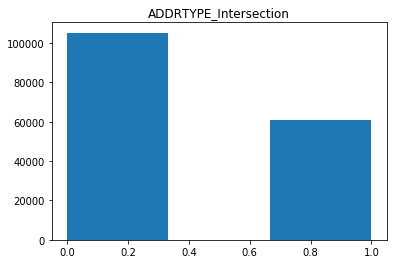

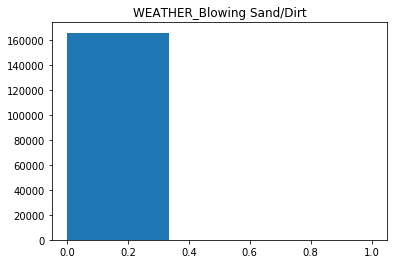

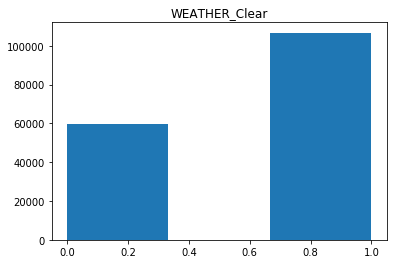

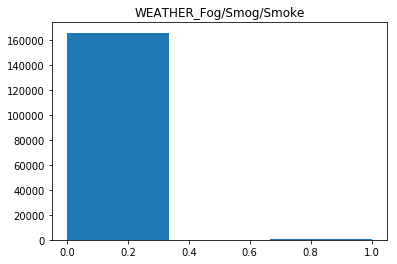

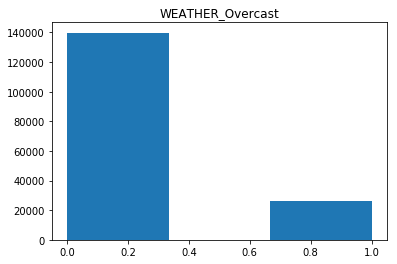

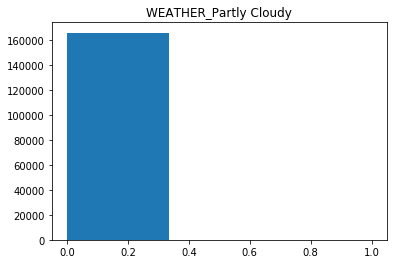

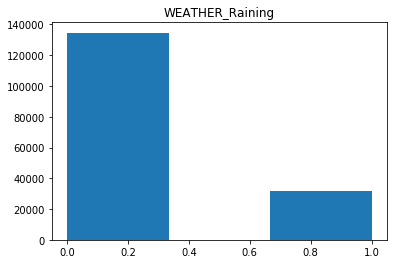

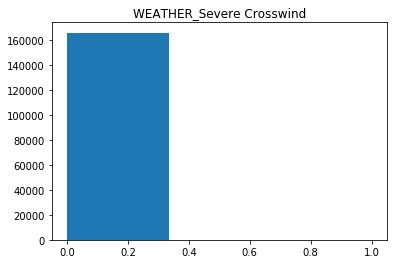

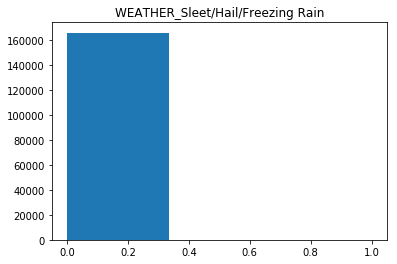

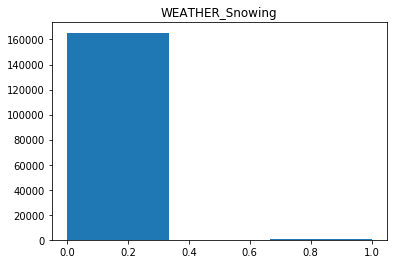

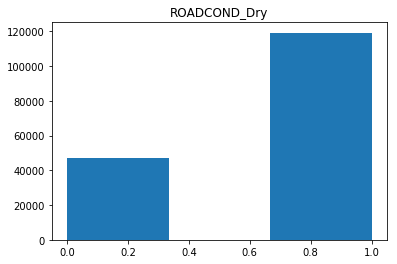

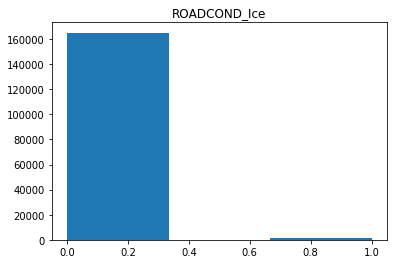

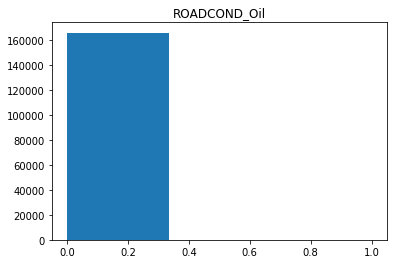

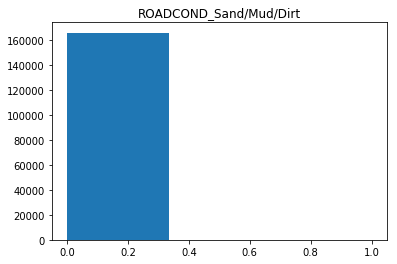

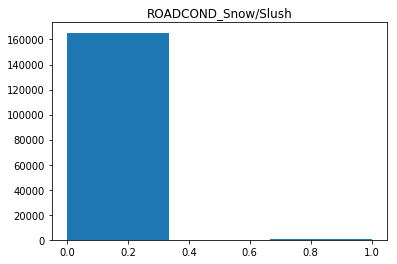

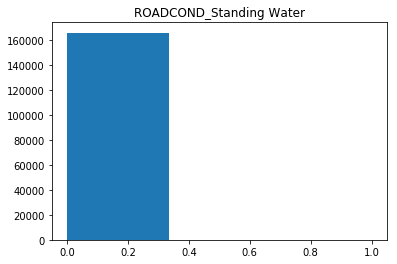

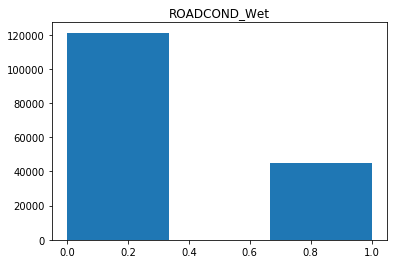

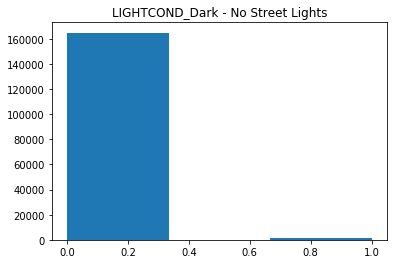

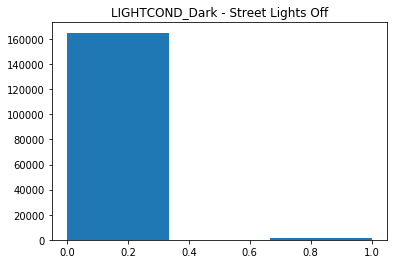

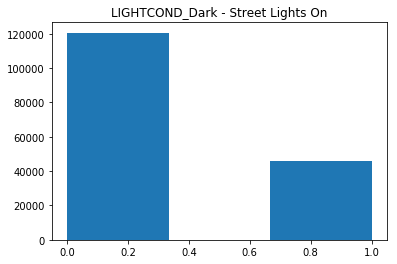

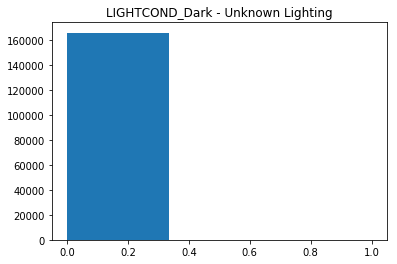

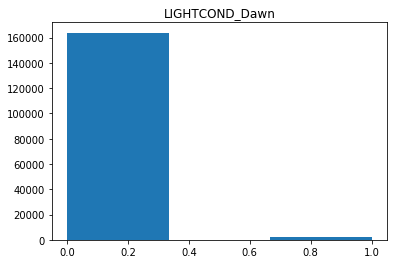

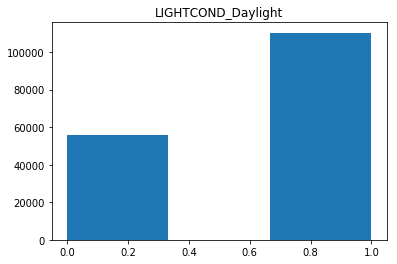

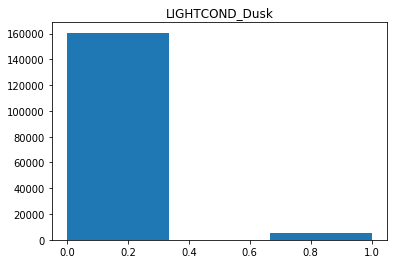

In [34]:
for (columnName, columnData) in df_col.iteritems():
    ax = plt.hist(columnData, bins=3)
    plt.title(columnName)
    plt.show()
    

**Data of type 1 incident**

In [35]:
df_col_type1 = df_col[df_col.SEVERITYCODE == 1]
df_col_type1.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,...,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
1,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [36]:
df_col_type1.shape

(111503, 26)

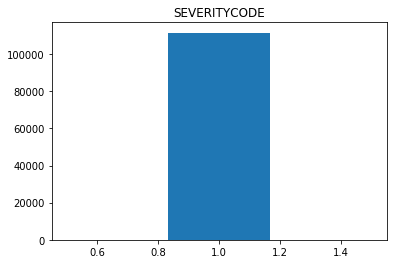

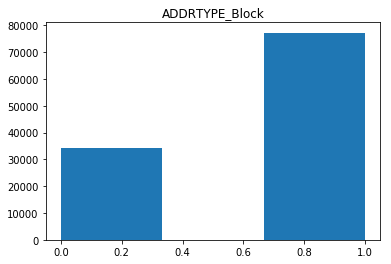

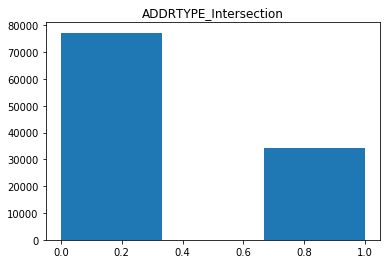

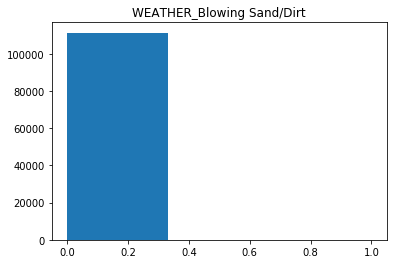

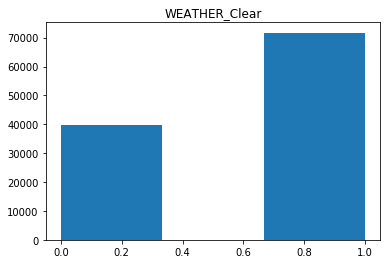

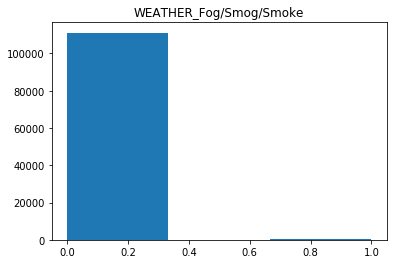

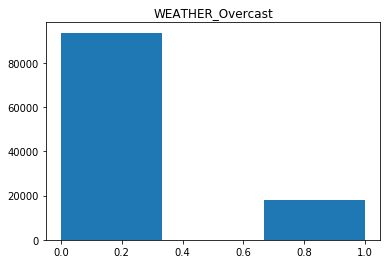

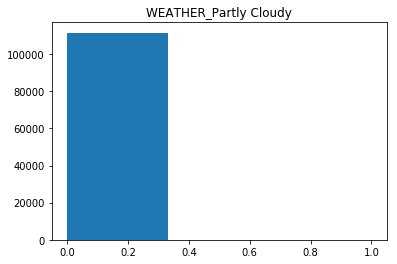

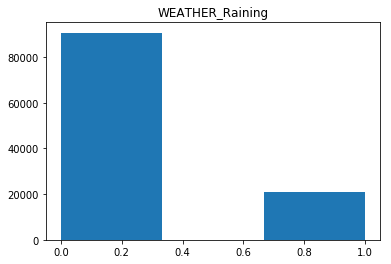

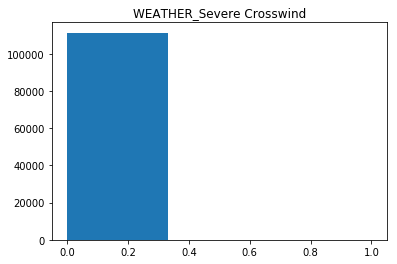

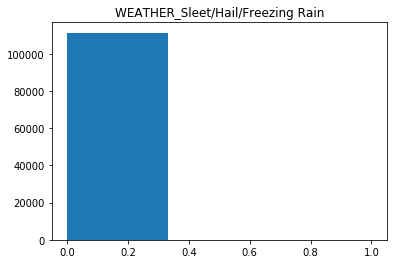

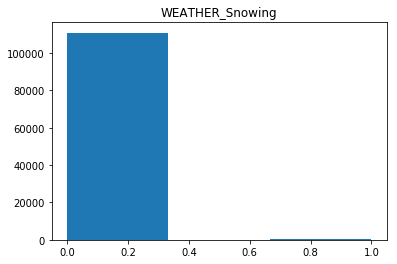

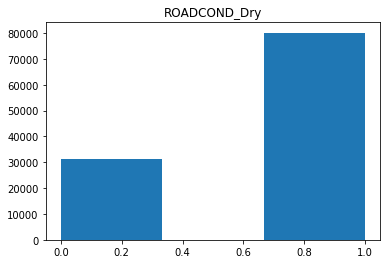

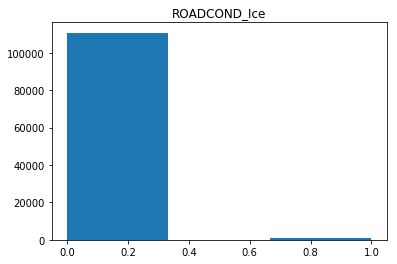

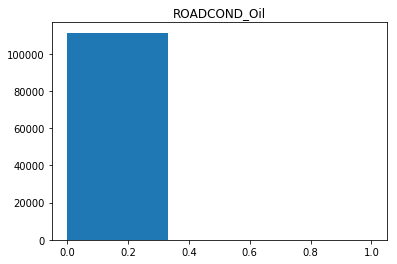

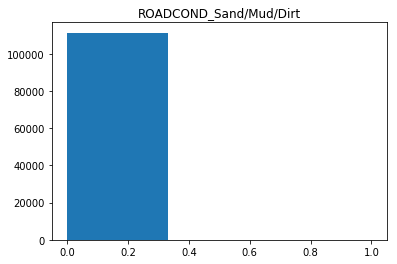

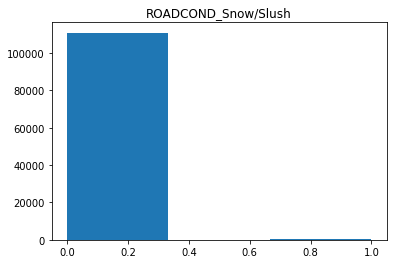

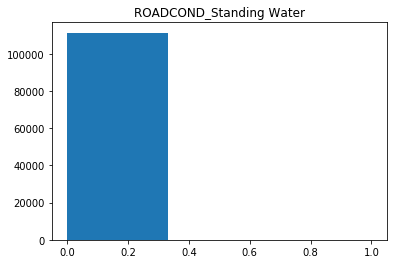

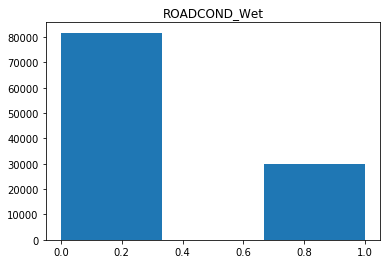

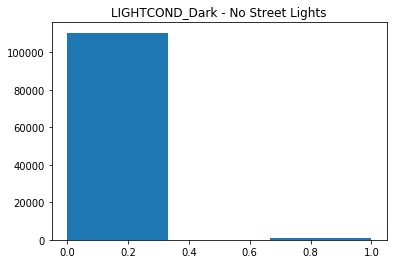

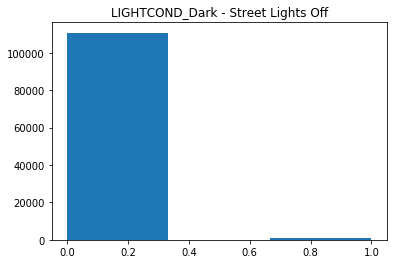

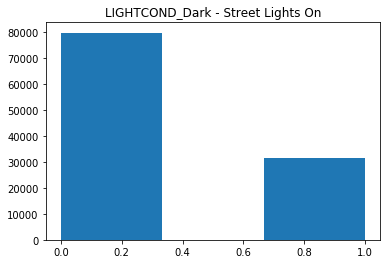

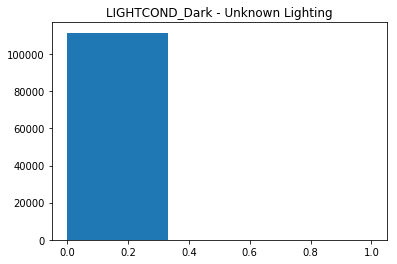

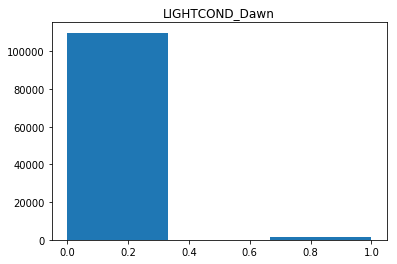

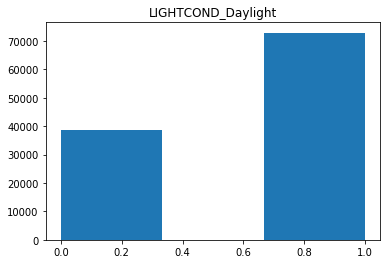

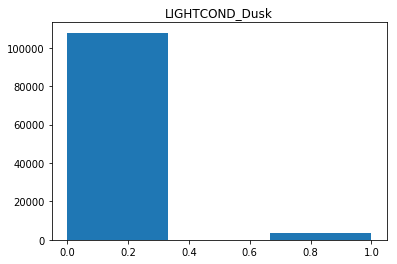

In [37]:
for (columnName, columnData) in df_col_type1.iteritems():
    ax = plt.hist(columnData, bins=3)
    plt.title(columnName)
    plt.show()

**for collisions type 2**

In [38]:
df_col_type2 = df_col[df_col.SEVERITYCODE == 2]
df_col_type2.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,...,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
0,2,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
7,2,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,2,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14,2,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [39]:
df_col_type2.shape

(54714, 26)

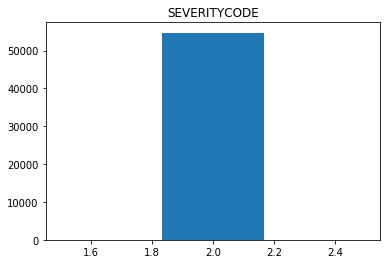

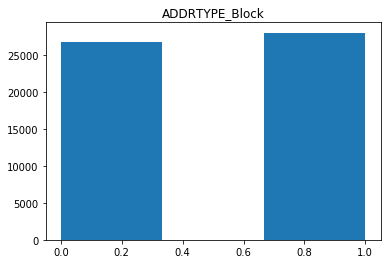

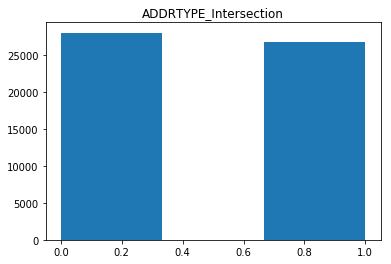

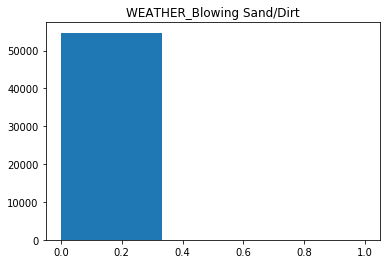

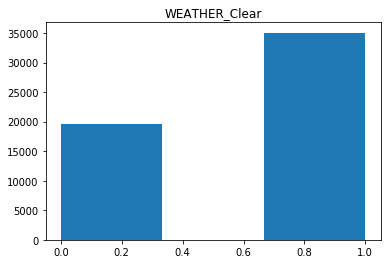

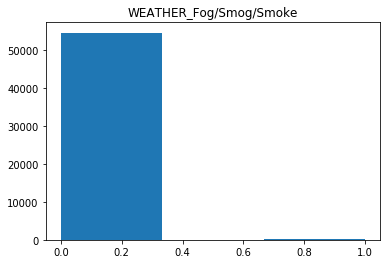

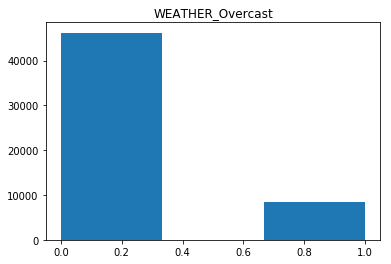

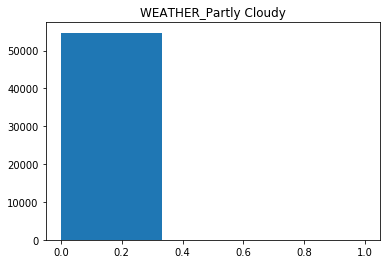

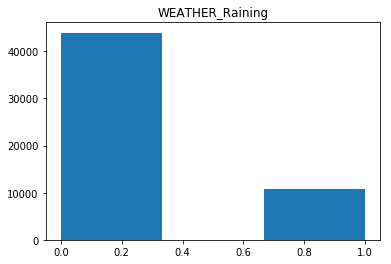

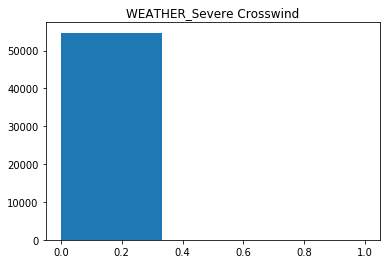

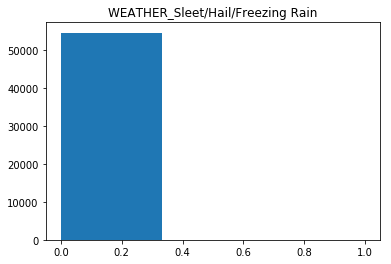

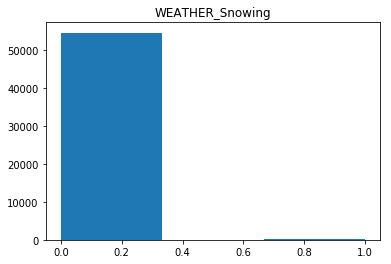

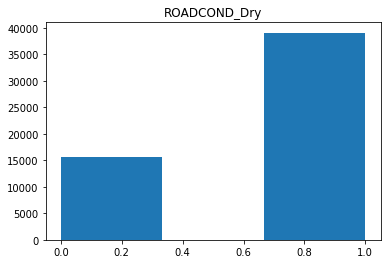

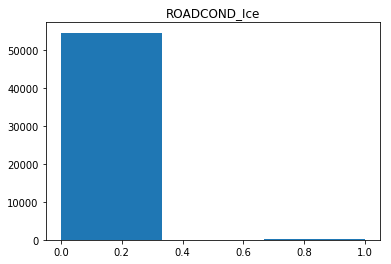

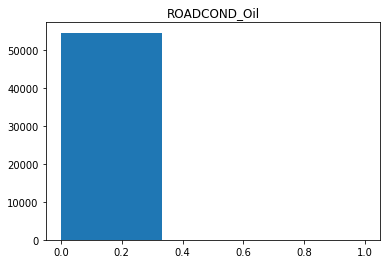

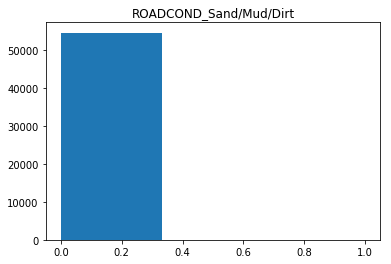

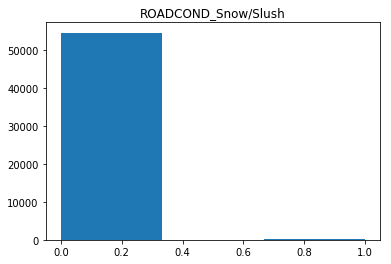

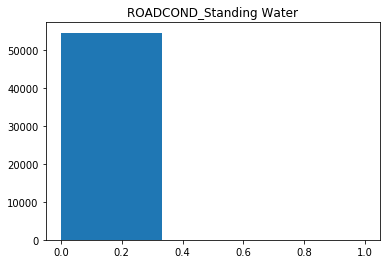

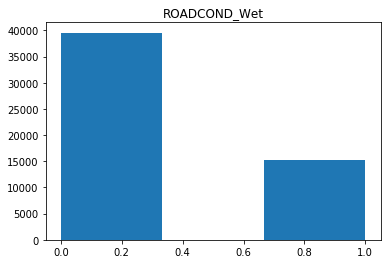

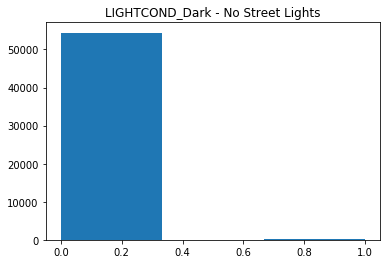

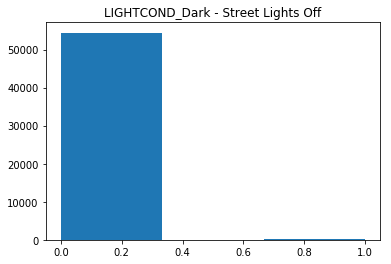

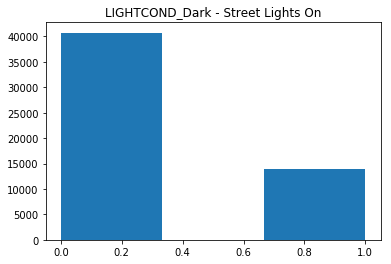

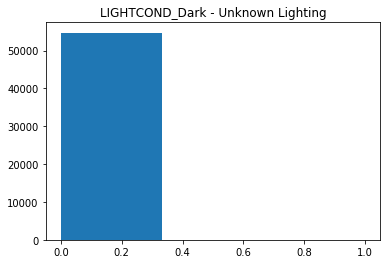

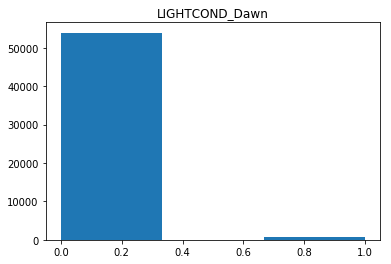

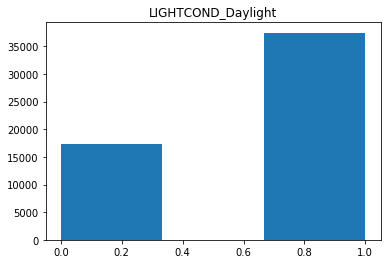

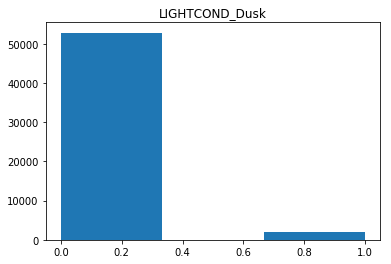

In [40]:
for (columnName, columnData) in df_col_type2.iteritems():
    ax = plt.hist(columnData, bins=3)
    plt.title(columnName)
    plt.show()

## Prediction Models

### We are going to try a decission tree, k-nearest neighbours and Logistic regression

### Data Preperation

**Normalization is not needed, since all values are categorical**

**Balance the dataset so that there is an equal amount of type 1 and 2 incidents to avaoid bias towards one of the two**

In [42]:
df_col = df_col.sort_values('SEVERITYCODE')

In [48]:
#drop half of the type 1 rows
df_col_bal = df_col.iloc[55000:]

In [49]:
df_col_bal.shape

(111217, 26)

**create feature set X and Label Y as numpy arrays because scikit-learn can't handle panda dataframes**

In [52]:
X = np.asarray(df_col_bal.drop(columns='SEVERITYCODE', axis = 1))

In [56]:
X[0:10]

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0]], dtype=uint8)

In [57]:
Y = np.asarray(df_col_bal['SEVERITYCODE'])

In [58]:
Y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [74]:
X_train.shape

(88973, 25)

In [75]:
y_train.shape

(88973,)

In [76]:
X_test.shape

(22244, 25)

In [77]:
y_test.shape

(22244,)

In [81]:
#reduce dataset size for debugging code. once bug free use full data set
X_train10 = X_train[0:10]
y_train10 = y_train[0:10]
X_test10 = X_test[0:10]
y_test10 = y_test[0:10]

### K-nearest neighbours classifier

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [180]:
# test for different numbers of nearest neightbours from 1 to 20:
Ks = 21
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)

    
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])
    
    print(f'Accuracy-score for {n} nearest neighbors is {accuracy_score(y_test,yhat_knn)}')
    print(f'{classification_report(y_test,yhat_knn)} \n \n \n \n')
#mean_acc

Accuracy-score for 1 nearest neighbors is 0.5605556554576515
              precision    recall  f1-score   support

           1       0.57      0.52      0.55     11230
           2       0.55      0.60      0.57     11014

   micro avg       0.56      0.56      0.56     22244
   macro avg       0.56      0.56      0.56     22244
weighted avg       0.56      0.56      0.56     22244
 
 
 
 

Accuracy-score for 2 nearest neighbors is 0.5747167775579932
              precision    recall  f1-score   support

           1       0.56      0.76      0.64     11230
           2       0.61      0.39      0.47     11014

   micro avg       0.57      0.57      0.57     22244
   macro avg       0.58      0.57      0.56     22244
weighted avg       0.58      0.57      0.56     22244
 
 
 
 

Accuracy-score for 3 nearest neighbors is 0.5605556554576515
              precision    recall  f1-score   support

           1       0.57      0.53      0.55     11230
           2       0.55      0.59     

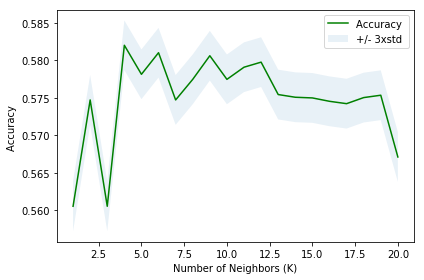

In [182]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [183]:
print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was 0.5819996403524546 with k= 4


In [184]:
 #Train Model and Predict for specific neighbour values n
    
n = 50
neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
yhat_knn=neigh.predict(X_test)
    
print(f'Accuracy-score for {n} nearest neighbors is {accuracy_score(y_test,yhat_knn)}')
print(f'{classification_report(y_test,yhat_knn)} \n \n \n \n')

Accuracy-score for 50 nearest neighbors is 0.582808847329617
              precision    recall  f1-score   support

           1       0.58      0.64      0.61     11230
           2       0.59      0.53      0.56     11014

   micro avg       0.58      0.58      0.58     22244
   macro avg       0.58      0.58      0.58     22244
weighted avg       0.58      0.58      0.58     22244
 
 
 
 



In [185]:
 #Train Model and Predict for specific neighbour values n
    
n = 100
neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
yhat_knn=neigh.predict(X_test)
    
print(f'Accuracy-score for {n} nearest neighbors is {accuracy_score(y_test,yhat_knn)}')
print(f'{classification_report(y_test,yhat_knn)} \n \n \n \n')

Accuracy-score for 100 nearest neighbors is 0.5827638913864412
              precision    recall  f1-score   support

           1       0.59      0.59      0.59     11230
           2       0.58      0.57      0.58     11014

   micro avg       0.58      0.58      0.58     22244
   macro avg       0.58      0.58      0.58     22244
weighted avg       0.58      0.58      0.58     22244
 
 
 
 



In [181]:
 #Train Model and Predict for specific neighbour values n
    
n = 300
neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
yhat_knn=neigh.predict(X_test)
    
print(f'Accuracy-score for {n} nearest neighbors is {accuracy_score(y_test,yhat_knn)}')
print(f'{classification_report(y_test,yhat_knn)} \n \n \n \n')

Accuracy-score for 300 nearest neighbors is 0.5876191332494156
              precision    recall  f1-score   support

           1       0.58      0.63      0.61     11230
           2       0.59      0.54      0.56     11014

   micro avg       0.59      0.59      0.59     22244
   macro avg       0.59      0.59      0.59     22244
weighted avg       0.59      0.59      0.59     22244
 
 
 
 



### Support Vector Machine

In [186]:
from sklearn import svm


In [ ]:
#iterate over the differnt kernels to see which one performed best

kernels = ['linear','poly','rbf','sigmoid']

for kernel in kernels:
    
    svm_model = svm.SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    yhat_svm = svm_model.predict(X_test)
    
    print(f'Accuracy-score for Kernel "{kernel}" is {accuracy_score(y_test,yhat_svm)}')
    print(f'{classification_report(y_test,yhat_svm)} \n \n \n \n')

Accuracy-score for Kernel "linear" is 0.5934184499190793
              precision    recall  f1-score   support

           1       0.58      0.70      0.64     11230
           2       0.61      0.48      0.54     11014

   micro avg       0.59      0.59      0.59     22244
   macro avg       0.60      0.59      0.59     22244
weighted avg       0.60      0.59      0.59     22244
 
 
 
 



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy-score for Kernel "poly" is 0.5935982736917821
              precision    recall  f1-score   support

           1       0.58      0.70      0.64     11230
           2       0.61      0.48      0.54     11014

   micro avg       0.59      0.59      0.59     22244
   macro avg       0.60      0.59      0.59     22244
weighted avg       0.60      0.59      0.59     22244
 
 
 
 



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy-score for Kernel "rbf" is 0.5934184499190793
              precision    recall  f1-score   support

           1       0.58      0.70      0.64     11230
           2       0.61      0.48      0.54     11014

   micro avg       0.59      0.59      0.59     22244
   macro avg       0.60      0.59      0.59     22244
weighted avg       0.60      0.59      0.59     22244
 
 
 
 



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
#check if gini or entropy criterion works better
criteria = ['gini', 'entropy']
for criterion in criteria:
    tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = None)
    tree_model.fit(X_train,y_train)
    
    yhat_tree = tree_model.predict(X_test)
    
    print(f'Accuracy-score for criterion "{criterion}" is {accuracy_score(y_test,yhat_tree)}')
    print(f'{classification_report(y_test,yhat_tree)} \n \n \n \n')

Accuracy-score for criterion "gini" is 0.9
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

   micro avg       0.90      0.90      0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10
 
 
 
 

Accuracy-score for criterion "entropy" is 0.8
              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

   micro avg       0.80      0.80      0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10
 
 
 
 



### Logistic Regression Model

In [149]:
from sklearn.linear_model import LogisticRegression

In [174]:
#compare differnt regularization parameters C
regularization_parameters = [0.001,0.005,0.01,0.05,0.1,0.5,1,5]

for parameter in regularization_parameters:
    
    LR_model = LogisticRegression(C=parameter, solver='liblinear').fit(X_train,y_train)
    yhat_LR = LR_model.predict(X_test)
    

    print(f'Accuracy-score for Regularization Parameter "{parameter}" is {accuracy_score(y_test,yhat_LR)}')
    print(f'{classification_report(y_test,yhat_LR)} \n \n \n \n')

Accuracy-score for Regularization Parameter "0.001" is 0.6
              precision    recall  f1-score   support

           1       0.57      0.80      0.67         5
           2       0.67      0.40      0.50         5

   micro avg       0.60      0.60      0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10
 
 
 
 

Accuracy-score for Regularization Parameter "0.005" is 0.6
              precision    recall  f1-score   support

           1       0.57      0.80      0.67         5
           2       0.67      0.40      0.50         5

   micro avg       0.60      0.60      0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10
 
 
 
 

Accuracy-score for Regularization Parameter "0.01" is 0.6
              precision    recall  f1-score   support

           1       0.57      0.80      0.67         5
           2       0.67      0.40      0.50  